## Project: Diabetes Disease Prediction

The Diabetes is a disease in which the body’s ability to produce or respond to the hormone insulin is impaired, resulting in abnormal metabolism of carbohydrates and elevated levels of glucose in the blood and urine.

Origin mid 16th century: via Latin from Greek, literally ‘siphon,’ from diabainein ‘go through’; mellitus is from Latin mellitus ‘sweet.’ 

The Objective of this Project is to take a closer look at the data and to predict the chance of occurrence based on the various features (Risk Factors) responsible for the Disease.

Accordingly calculate the Insurance Premium for the following candidate.

The Data set used here is taken from UCI ML Repository [Data Set](http://archive.ics.uci.edu/ml/datasets). 

Project Overview:
1. Data Set Structure.
2. Data Cleaning.
3. Applying Machine Learning Algorithms 
4. Conclusion 

We will predict using 3 Algorithms Linear Regression, Random Forest, K Nearest Neighbours compare their accuracy and will conclude which one is the best amoug these 3.


## 1. Data Set Structure

The Data Set used in this project consists of 9 Different Feature (Risk Factors) which describe the condition of the person. Based on this 9 Features we classify the person in to 2 differnet stages (Valuse 0, 1) value 0 represents the absence of the disease and 1 represents the patient is deseased.

### Features:

-Data columns (total 9 columns):

-Pregnancies                 

-Glucose                     

-BloodPressure               

-SkinThickness               

-Insulin                     

-BMI                         

-DiabetesPedigreeFunction    

-Age                         

-Outcome                     

### Importing Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

### Data Input

In [77]:
df = pd.read_csv('diabetes.csv')

print("Records: {}\nVariables: {}".format(df.shape[0], df.shape[1]))

df.head(20)

Records: 768
Variables: 9


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [78]:
# Gives us the Detailed Information About the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 2. Data Cleaning 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Age of patients with Diabetes disease')

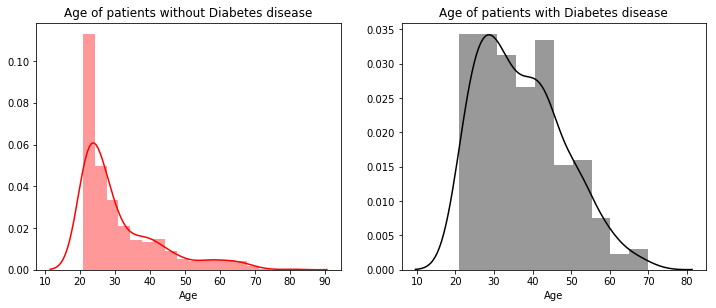

In [79]:
# create four distplots
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['Outcome']==0].Age, color="red")
plt.title('Age of patients without Diabetes disease')
plt.subplot(222)
sns.distplot(df[df['Outcome']==1].Age, color="black")
plt.title('Age of patients with Diabetes disease')

In order to make our dataset compatible with machine learning algorithms contained in Sci-kit Learn library, we need to handle all missing data.

There are many options we could consider when replacing a missing value, for example:
- A constant value such as 0, distinct from other values
- Random Value from the dataset
- A mean, median or mode of the corresponding value
- An estimated value

In [80]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above information we can tell that there are no empty values.
Now its time to separate the Target Variable.

In [81]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

Now will separate the Test Data and Train Data. Will keep 40% of the data for Testing purpose and rest for training purpose.

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2606)

Now, will standardize and Normalyze the Data. So the whole Data will be with respect the Standard Deviation of each feature.  

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Machine Learning Algorithms

The main final goal of the study is to predict the person with Disease with the highest accuracy possible. For that purpose we are implementing three different algorithms which gives us the results with different accuracy. We have choosen this three algorithms based on solving supervised learning problems. This shows us the best performing algorithm for this kind of problem.

Here we are using Scikit learn library and create a function which trains out models. To check whether our model is overfitting or underfitting we are showing accuracy on both train and test sets(which is also known as so-called bias/variance tradeoff).

In [84]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    model = classifier(**kwargs)
    model.fit(X_train,y_train)
    
    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

## Logistic Regression

This method is a basic technique in statistical analysis which practicing to predict 
a data value based on previous observations. This algorithm gives the relationship 
between a dependent variable and one or more dependent variable.

In [85]:
# Logistic Regression
model = train_model(X_train, y_train, X_test, y_test, LogisticRegression)

Train accuracy: 78.03%
Test accuracy: 77.49%


### Random Forests

Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.



Train accuracy: 97.95%
Test accuracy: 73.59%


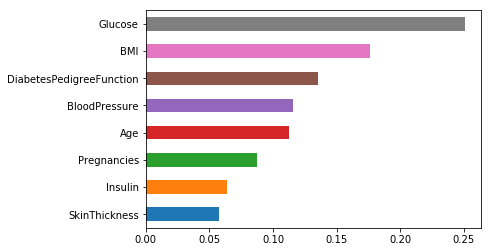

In [86]:
# Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, random_state=2606)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh()

### Altering 'n_estimator'

In [87]:
# tuned Random Forests
model = train_model(X_train, y_train, X_test, y_test, RandomForestClassifier, n_estimators=1177, random_state=2)

Train accuracy: 100.00%
Test accuracy: 77.49%


### K Nearest Neighbours

In [88]:
model = train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=9)

Train accuracy: 78.40%
Test accuracy: 75.32%


In [89]:
#for i in range(1,10):
 #   print("n_neigbors = "+str(i))
  #  train_model(X_train, y_train, X_test, y_test, KNeighborsClassifier, n_neighbors=i)

## 4. Conclusion

The perpose of the project was corelate three different algorithms. Which gives us an opourtunity to  predict if the patient, having various personal characteristics and symptoms, will get Diabetes or not. Final Results are as shown in below.


In [92]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['Logistic Regression', 'Random Forests', 'Knn (9 Neighbors)']

# list of algorithms with parameters
models = [LogisticRegression(), RandomForestClassifier(n_estimators=1177, random_state=2), KNeighborsClassifier(n_neighbors=9)]

for i in models:
    model = i
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    accuracy.append(score)

In [93]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
Logistic Regression,0.774892
Random Forests,0.774892
Knn (9 Neighbors),0.753247


As we can see from the above result that Logistic Regression model has performed equally good as Random Forest while Knn has less accuracy. In this project we can say that in machine learning problems data processing and tuning makes the model more accurate and efficient compare to non processed data. It also makes simple models quite accurate.

This results show us that  machine learning is having a good impact on the future of medical treatment based on patients data. Having such information makes a patients and doctors life much easier than before.